# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [36]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [37]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [38]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [3,155,245]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,13265,1196,4221,6404,507,1788
1,1989,10690,19460,233,11577,2153
2,3062,6154,13916,230,8933,2784


     Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
3    67.73  18.75    46.59   87.95             40.68         74.77
155  16.36  86.36    90.45    8.41             94.55         80.68
245  24.09  68.18    84.32    8.18             92.73         88.18


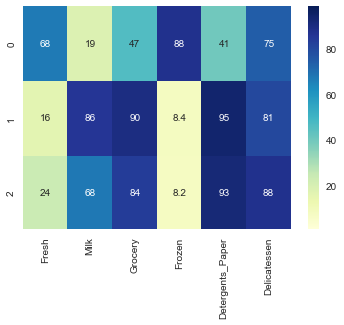

In [39]:
# Percentile ranks
import seaborn as sns

# look at percentile ranks
pcts = 100. * data.rank(axis=0, pct=True).iloc[indices].round(decimals=4)
print pcts

# visualize percentiles with heatmap
_ = sns.heatmap(pcts.reset_index(drop=True), annot=True, vmin=1, vmax=99, cmap='YlGnBu')

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**

The table below shows 3 selected customers and their possible kind of establishment. It also shows whether the customer is a Small, Large or Average purchaser of each of the product categories relative to the min/max/average of the entire population statistics. 

|          | Large                           | Average                          | Small                                   | Kind of Establishment |
|----------|---------------------------------|----------------------------------|-----------------------------------------|-----------------------|
| Sample 0 | Frozen                          | Fresh, Delicatessen                            | Milk, Grocery, Detergents_Paper | Cafe                 |
| Sample 1 | Milk, Grocery, Detergents_Paper | Delicatessen                     | Fresh, Frozen                           | Retail                |
| Sample 2 | Detergents_Paper, Grocery                    | Delicatessen, Milk | Fresh, Frozen                                  | Large Restaurant or Retail            |


### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [40]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop(['Fresh'], axis = 1)
y = data['Fresh']

# TODO: Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(new_data, y, test_size=0.25, random_state=42)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train,y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print "Prediction Score = {}".format(score)

Prediction Score = -0.385749710204


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**

I attempted to predict the relevancy of the "Fresh" Category, and its R^2 score is negative (-0.3857). The negative coefficient of determination indicate that the Fresh product category include information that is missing from the other products. Thus,  the Fresh Products are not relevent to the other products and this feature is necessary for identifying customer's spending habits.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

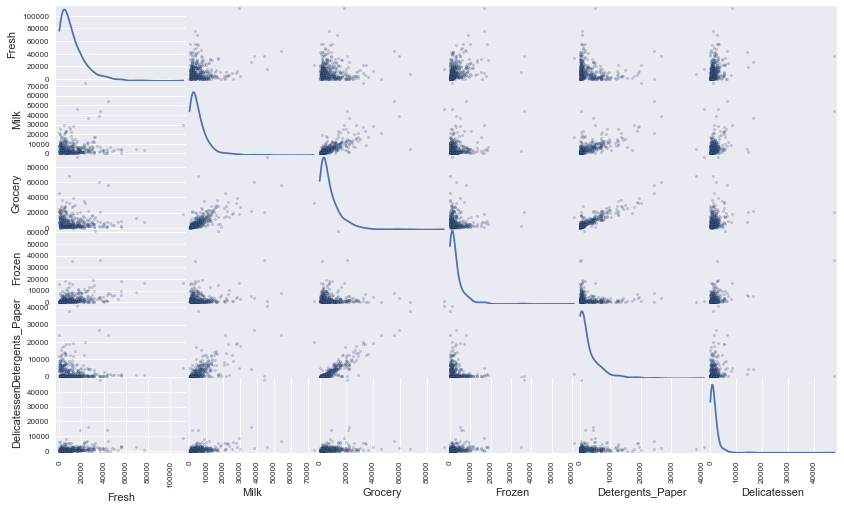

In [41]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**

From the above scatter matrix plot, it seems that (Grocery & Detergents_Paper) and (Milk & Grocery) have some degree of correlation. The plot confirms that Fresh product category does not have any correlation with other product categories.

The scatter matrix shows that the distributions are right skewed and the mean is greater than the median. Also, the tail of the distribution on the right hand (positive) side is longer than on the left hand side. Thus this make this ideal for something like a log transformation or square root transformation. As we typically see this type of distribution when working with income data.

We can also easily see correlation with a seaborn correlation plot

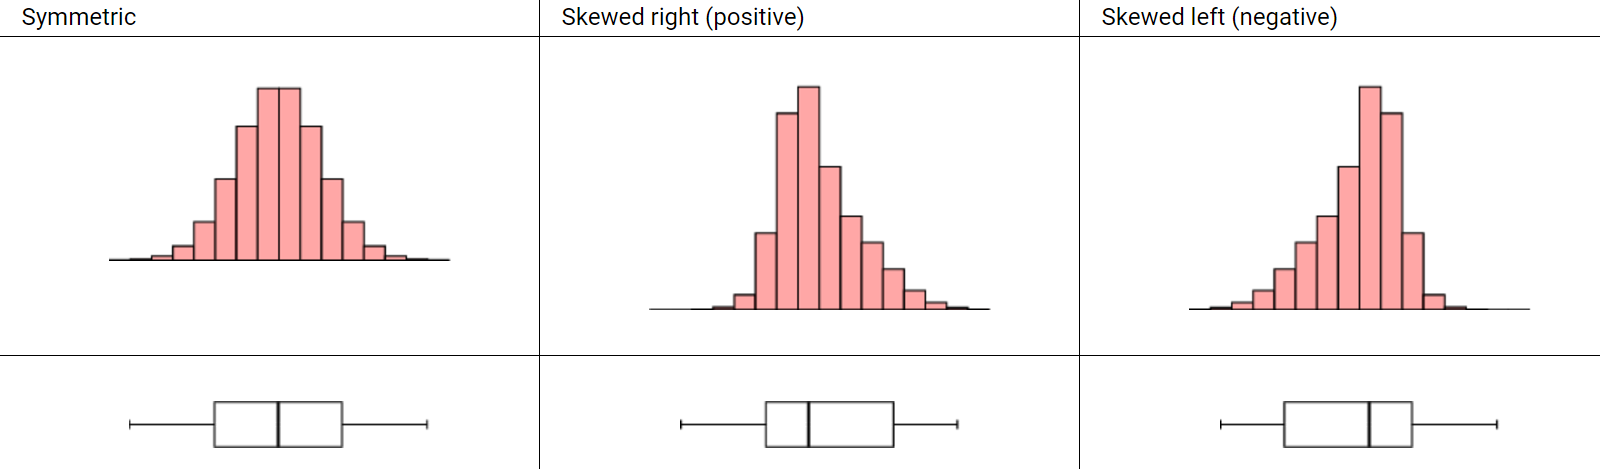

In [42]:
from IPython.display import Image
Image(filename='skewness of the distribution.PNG')

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

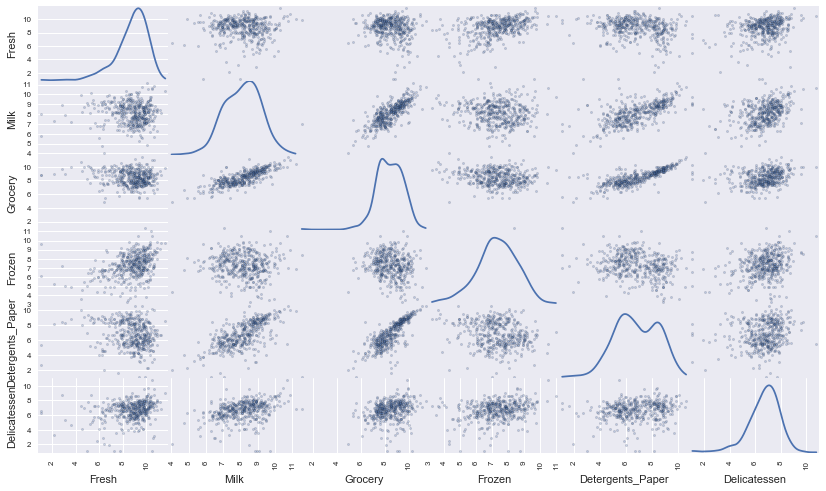

In [43]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [44]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
1,7.595387,9.277064,9.876116,5.451038,9.356776,7.674617
2,8.026824,8.724858,9.540795,5.438079,9.097508,7.931644


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [45]:
# For each feature find the data points with extreme high or low values
all_outliers = []
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
   
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    feature_outliers = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    all_outliers.append(feature_outliers.index.values)
    display(feature_outliers)

# OPTIONAL: Select the indices for data points you wish to remove
from itertools import chain
outliers = list(chain(*all_outliers))

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


### Question 4
*Are there any data points considered outliers for more than one feature? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

In [46]:
from collections import Counter
[item for item, count in Counter(outliers).iteritems() if count > 1]


[128, 154, 65, 66, 75]

**Answer:**

There are 5 data points that are outlier for more than one feature. Those data points are 65,66,75,128,154.

All of the outlier points have been removed from the dataset because any data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

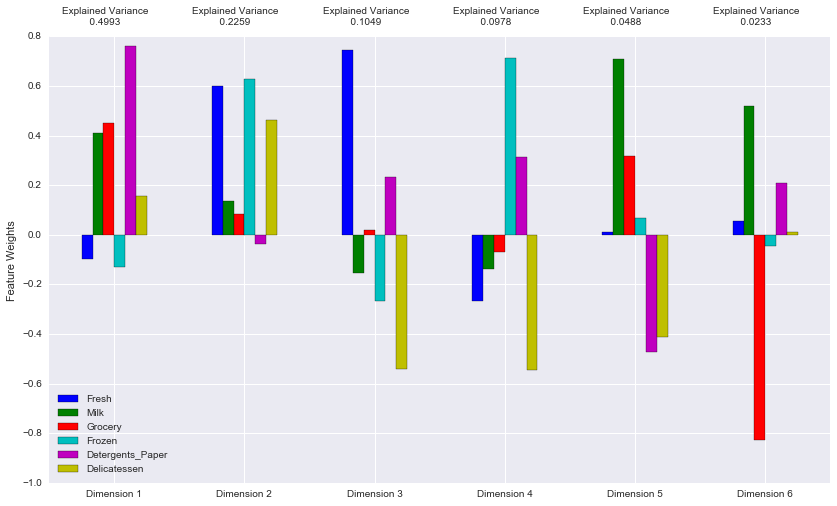

In [47]:
from sklearn.decomposition import PCA
# TODO: Apply PCA to the good data with the same number of dimensions as features
pca = PCA(n_components=6).fit(good_data)

# TODO: Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

In [48]:
print "Total Explained Variance by 1st and 2nd PCAs = {0:.2f}".format(pca.explained_variance_ratio_[0] + 
                                                                 pca.explained_variance_ratio_[1])

print "Total variance for the four first PCAs = {0:.2f}".format(pca.explained_variance_ratio_[0] + 
                                                          pca.explained_variance_ratio_[1] + 
                                                          pca.explained_variance_ratio_[2] + 
                                                          pca.explained_variance_ratio_[3])
print pca.components_[0]
print pca.components_[1]
print pca.components_[2]
print pca.components_[3]

Total Explained Variance by 1st and 2nd PCAs = 0.73
Total variance for the four first PCAs = 0.93
[-0.09758688  0.41085006  0.45111781 -0.12804262  0.75951245  0.15785331]
[ 0.60077834  0.1369893   0.08516261  0.62996118 -0.03761194  0.46344461]
[ 0.74520543 -0.15440822  0.02038937 -0.26695167  0.23485013 -0.54221164]
[-0.26670888 -0.13749532 -0.0709773   0.71328102  0.31568384 -0.54451588]


**Answer:**

The first two PCAs are essentially reusing 73% of the entire original data.

The first four PCAs are essentially reusing 93% of the entire original data.

PCA can be used for two cases, one is to look at correlations between data and the second to perform feature reduction by making composite features.

The first principal component is strongly correlated with 3 of the original features which are Milk, Grocery and Detergents_Paper. As expected from the previous steps, this also suggests that these three product categories vary/correlated with each other. If one increases, then the remaining two also increase. Furthermore, we see that the first principal component correlates most strongly with the Detergents_Paper. In fact, the highest eigenvalue in the first PCA (0.759) indicates that this PCA is primarily a measure of the Detergents_Paper. This PCA indicates that customers who purchase large amount of Detergents_Paper products, also tend to purchase lot of Milk and Grocery products.

The 2nd principal component is strongly correlated with three of the other original features which are Fresh, Frozen and Deli products. This suggests that these three product categories at some degree vary/correlated with each other. Furthermore, we see that the 2nd principal component correlates most strongly with the Fresh and Frozen products. In fact, the highest eigenvalues in the 2nd PCA (0.629, 0.600) indicates that this principle component is primarily a measure of the combined Fresh and Frozen products. This PCA indicates that customers who purchase large amount of Fresh and Frozen products, also tend to purchase Deli products.

In the 3rd principal component, the highest eigenvalue is (0.745) and it indicates that this principle component is primarily a measure of the Fresh products and it slightly correlated with Detergents_Paper products. The visualization suggests that customers who purchase large amount of Fresh products not necessarily interested in purchasing other product categories except Detergents_Paper products. The amplitude negative weight of "Delicatessen" indicates this product has negative corrolation with Fresh Products. 

In the 4th principal component, the highest eigenvalue is (0.713) and it indicates that this principle component is primarily a measure of the Frozen products and it is correlated with Detergents_papaer products. The visualization suggests that customers who purchase large amount of Frozen products not necessarily interested in purchasing other product categories except Detergents_Paper products. The amplitude negative weight of "Delicatessen" indicates this product has negative corrolation with Frozen Products. 


In terms of customers, since PCA deals with the variance of the data and the correlation between features, the first component would represent that we have some customers who purchase a lot of Milk, Grocery and Detergents_Paper products while other customers purchase very few amounts of Milk, Grocery and Detergents_Paper, hence spread in the data.


We can use this discovery to encourage our wholesale distributor client to reduce costs by bundling/delivering these items together.



### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [49]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-0.9986,1.3694,-0.2854,0.3997,-0.6781,-0.6194
1,3.6055,-1.4594,-0.4880,-0.9810,-0.4425,-0.0433
2,3.0306,-1.1837,-0.2848,-1.2274,-0.9191,-0.0795


We can also visualize the percent of variance explained to get a very clear understanding of the drop off between dimension. Here is a some starter code, as np.cumsum acts like += in python.

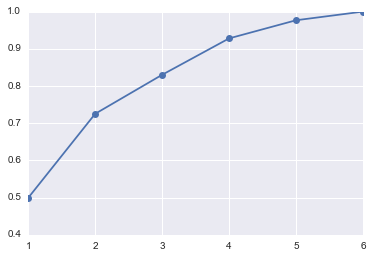

In [50]:
import matplotlib.pyplot as plt
x = np.arange(1, 7)
plt.plot(x, np.cumsum(pca.explained_variance_ratio_), '-o')

### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [51]:
# TODO: Fit PCA to the good data using only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Apply a PCA transformation the good data
reduced_data = pca.transform(good_data)

# TODO: Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [52]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-0.9986,1.3694
1,3.6055,-1.4594
2,3.0306,-1.1837


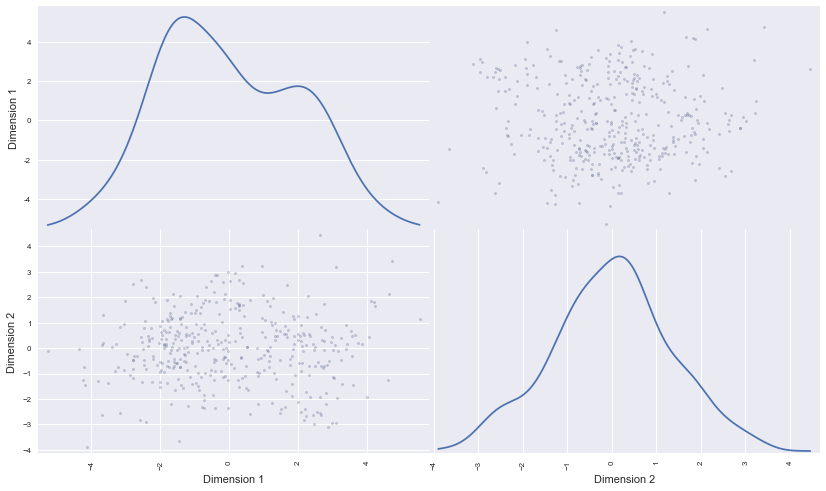

In [53]:
pd.scatter_matrix(reduced_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

We can also visualize the percent of variance explained to get a very clear understanding of the drop off between dimension. Here is a some starter code, as np.cumsum acts like += in python.

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

Here is the table that compares the 2 methods.

| Method name       | Parameters         | Scalability                                                   | Usecase                                                                   | Geometry (metric used)           |
|-------------------|--------------------|---------------------------------------------------------------|---------------------------------------------------------------------------|----------------------------------|
| K-Means           | number of clusters | Very large n_samples,  medium n_clusters  with MiniBatch code | General-purpose, even cluster size,  flat geometry, not too many clusters | Distances between points         |
| Gaussian mixtures | many               | Not scalable                                                  | Flat geometry, good for density estimation                                | Mahalanobis distances to centers |

The advantages of the K-Means algorithm is that it just requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields. K Means clustering is a quick and conceptually straightforward algorithm for clustering data. It works well when the data clusters are relatively simple in shape, but can struggle to identify clusters properly when the clusters have more complex non-linear geometries.

A Gaussian mixture model is a probabilistic model that assumes all the data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters. Gaussian Mixture Models is an generalization of K Means clustering that takes into account the covariance of the data. It does not presume the data has a specific structure that may in fact not be applicable.

I use GMM because, k-means has hard assignments, where each data point only belongs to one cluster. In GMM, each data point is generated from one of the clusters with a certain probability. Mixture models would let you determine these subpopulations, without associating each sample with a cluster. Thus, GMM is a better model to choice for this problem.


### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [54]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn import mixture
from sklearn.metrics import silhouette_score
n_components_range = range(2, 8)

sil_scores = []
best_number_clusters = 0
best_score = 0

for n_components in n_components_range:
    # Fit a mixture of Gaussians with EM
    gmm = mixture.GMM(n_components=n_components, covariance_type='spherical', random_state = 42)
    clusterer = gmm.fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)
    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen

    score = silhouette_score(reduced_data, preds)
    print "Number of Clusters = {} , silhouette Score = {}".format(n_components,score)

    sil_scores.append(score)

    if score > best_score:
        best_score = score
        best_number_clusters = n_components
            
print "Best number of clusters = {}".format(best_number_clusters)
print "Best silhouette score = {0:.4}".format(best_score)


gmm = mixture.GMM(n_components=best_number_clusters, covariance_type='spherical', random_state = 42)
clusterer = gmm.fit(reduced_data)
preds = clusterer.predict(reduced_data)
        
# TODO: Find the cluster centers
centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)


Number of Clusters = 2 , silhouette Score = 0.448878862156
Number of Clusters = 3 , silhouette Score = 0.353155346778
Number of Clusters = 4 , silhouette Score = 0.326605026768
Number of Clusters = 5 , silhouette Score = 0.338957815398
Number of Clusters = 6 , silhouette Score = 0.316435447527
Number of Clusters = 7 , silhouette Score = 0.338704099055
Best number of clusters = 2
Best silhouette score = 0.4489


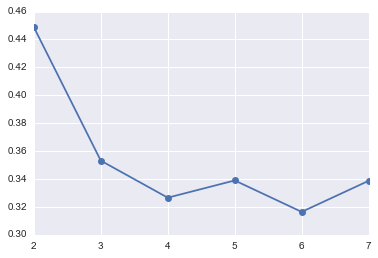

In [55]:
import matplotlib.pyplot as plt
_ = plt.plot(np.arange(2,8), sil_scores, '-o')

As we can clearly see that K = 2 has the highest score. Another really cool thing we can do with a silhouette score analysis is analyze them like this.

[Selecting the number of clusters with silhouette analysis on KMeans clustering](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**

From the output above, the best number of clusters is 2 and the best silhouette score is 0.4489.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

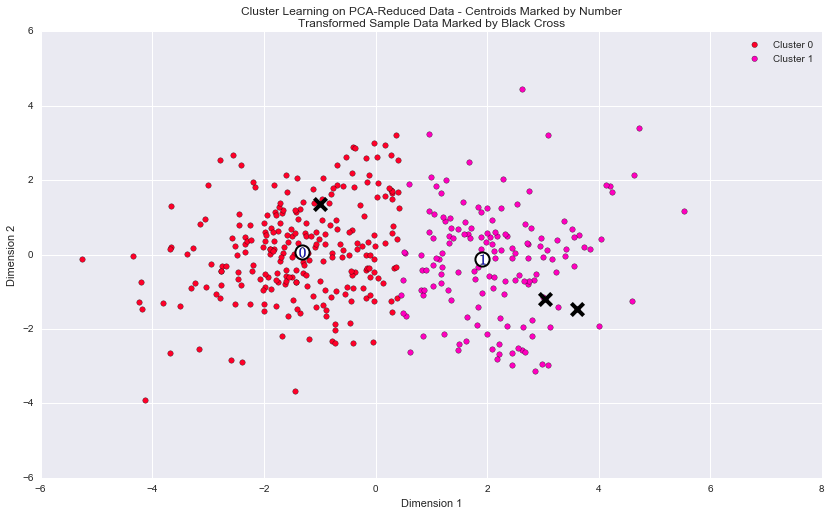

In [56]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [57]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,9053,1976,2512,2099,324,757
Segment 1,5875,7230,10571,1228,3770,1150


In [58]:
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


           Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Segment 0   52.5  31.9     31.4    59.0              30.1          42.8
Segment 1   38.0  75.3     74.9    43.4              73.8          58.4


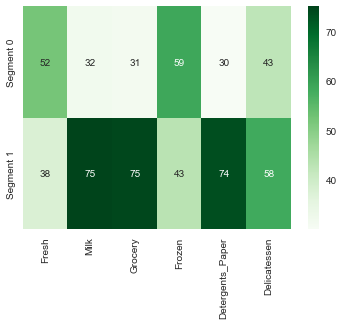

In [59]:
# add the true centers as rows to our original data
newdata = data.append(true_centers)

# show the percentiles of the centers
ctr_pcts = 100. * newdata.rank(axis=0, pct=True).loc[['Segment 0', 'Segment 1']].round(decimals=3)
print ctr_pcts

# visualize percentiles with heatmap
_ = sns.heatmap(ctr_pcts, annot=True, cmap='Greens')

### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**

The "Segment 1" could represent customers in Retail business which have large amount of purchases in Milk, Detergents_Paper, and Grocery products, less than average of Fresh and Frozen Products, and Deli.The customer who is assigned to 'cluster 1' should best identify with Retail businesses.

The "Segment 0" could represent customers in Restaurant/Cafe businesses which have less than average of purchases for all categories of products. The customer who is assigned to cluster 0 should best identify with Restaurant/Cafe businesses.





### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [60]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 1


In [61]:
display(samples)
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,13265,1196,4221,6404,507,1788
1,1989,10690,19460,233,11577,2153
2,3062,6154,13916,230,8933,2784


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,9053,1976,2512,2099,324,757
Segment 1,5875,7230,10571,1228,3770,1150


**Answer:**

The sample point 0 best represent the customer segment 0 (Restaurant/Cafe), since they don't buy large amounts of Milk, Grocery and Detergent_paper products.

The sample points 1 & 2 best represent the customer segment 1 (Retail), since they buy large amounts of Milk, Grocery, Detergent_papers, and Deli products.

The prediction of sample points are consistent with customer segments.

We can also easily visualize the cluster centroids with a pandas bar plot

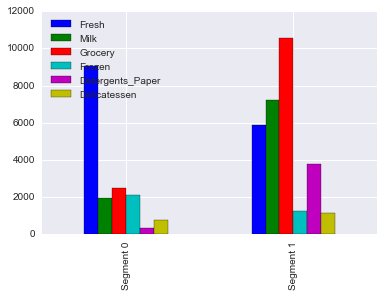

In [62]:
true_centers.plot(kind = 'bar')

## Conclusion

### Question 10
*Companies often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services. If the wholesale distributor wanted to change its delivery service from 5 days a week to 3 days a week, how would you use the structure of the data to help them decide on a group of customers to test?*  
**Hint:** Would such a change in the delivery service affect all customers equally? How could the distributor identify who it affects the most?

**Answer:**

We can perform A/B tests on two customer segments identified above seperatly without affecting the other segment. Generally, we have divided the customers into small to mid-size businesses like Restaurant/Cafe and large businesses like Retails. If we are going to change the delivery service from 5 to 3 days, I would recommend to select a group of customers from the "Segment 1" which we have identified as larger customers and perform the A/B testing on this segment of customers. This is important as large volume customers might have better equipments and facilities to cater to cheaper evening delivery as compared to smaller family run businesses.

Smaller customer segments like restaurant and cafe are most probably sensitive to time and cost of deliveries, since they are constantly in need of smaller amount of products to be delivered to them every day 5 days a week at the lowest possible price. Early morning or late afternoon deliveries which are cheaper might not work well for this segment of customers.

However, larger customers can utilize facilities for larger shipments of products 3 days a week and perhaps a bulk delivery system in the early business hours to reduce the cost. We could also try to run some marketing experiments, like offering discounts on 'Fresh' products to the customers who buy a lot of 'grocery' products to leverage product sales correlation that we have identified in PCA.


### Question 11
*Assume the wholesale distributor wanted to predict a new feature for each customer based on the purchasing information available. How could the wholesale distributor use the structure of the data to assist a supervised learning analysis?*  
**Hint:** What other input feature could the supervised learner use besides the six product features to help make a prediction?

**Answer:**

Now that the customers are assigned to a specific cluster, we can use that new feature as an additional input feature to a supervised learner.  We can essentially use the cluster labels as new features and use this new feature for classification and to segment certain customers from one another. 

This new feature can easily classify a new customer and relates this customer to the delivery schedules.


### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier on to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

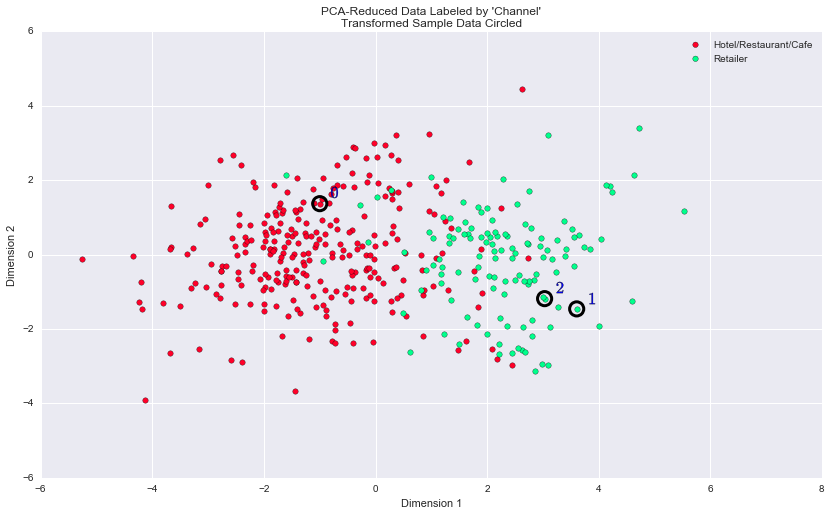

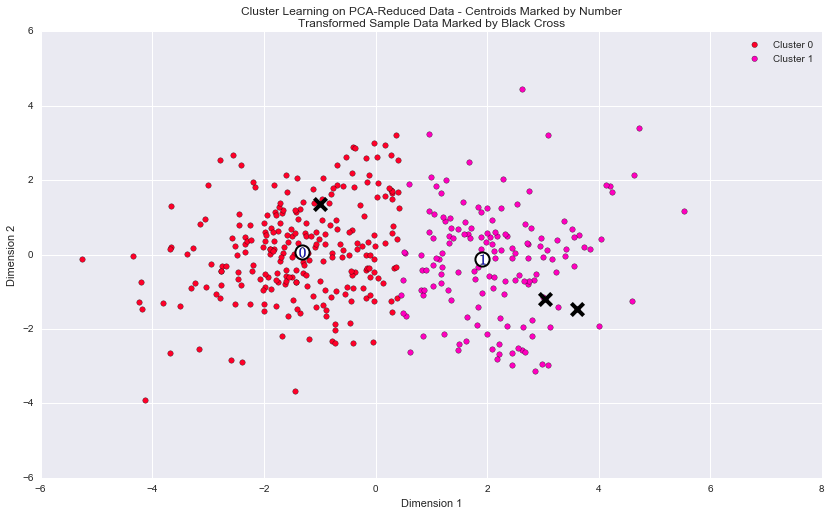

In [63]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

By putting the clustering results based on the channel data and clustering from the implementation side by side and comparing them, it reavels that the unsupervised algorithm used in the implementation has precisly clustered customers into 2 segments which they can be mapped into the Hotel/Restaurant/Cafe and Retail customers.

However, the channel data shows that there are some  Hotel/Restaurant/Cafe customers that are mixed with Retail customers and vice versa. But overall there are many customers that can be purly classified as Retailers' or 'Hotels/Restaurants/Cafes'. 

As we can see that real data is really never perfectly linearly separable but it seem like our cluster algorithm did a decent job.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.